Test how to highligh iNNvestigae weight scores and remove low score features

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [21]:
# from tensorflow import keras
# from tensorflow.keras.layers import Input, Dense
# from tensorflow.keras.models import Model

import keras
from keras.layers import Input, Dense
from keras.models import Model

import innvestigate
import innvestigate.utils as iutils

from sklearn import preprocessing

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mnist = keras.datasets.mnist
(X_train, label_train), (X_test, label_test) = mnist.load_data()
image_size = X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [4]:
input_size = 784
hidden_size = 64
output_size = 784

x = Input(shape=(input_size,))

# Encoder
h = Dense(hidden_size, activation='relu')(x)

# Decoder
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

In [5]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                          validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.0446 - val_loss: 0.0224
Epoch 2/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0173 - val_loss: 0.0129
Epoch 3/5
60000/60000 [==============================] - 6s 93us/step - loss: 0.0109 - val_loss: 0.0087
Epoch 4/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.0078 - val_loss: 0.0066
Epoch 5/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.0062 - val_loss: 0.0055


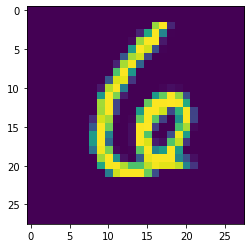

In [9]:
image = X_test[123]
plt.imshow(image.reshape(28, 28))

Analyzer from model

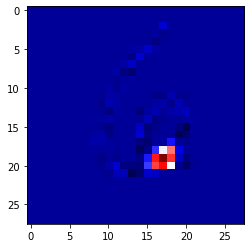

In [35]:

# Creating an analyzer
gradient_analyzer = innvestigate.create_analyzer("lrp.z", autoencoder)

# Applying the analyzer
analysis = gradient_analyzer.analyze(image.reshape(1,784))

plt.imshow(analysis.reshape(28, 28), cmap='seismic', interpolation='nearest')
plt.show()

In [43]:
ind = np.argpartition(analysis[0], -10)[-10:]
analysis[0][ind]

array([0.34290358, 0.35379463, 0.3553365 , 0.35636404, 0.4239086 ,
       0.50286865, 0.46691883, 0.35860273, 0.5169101 , 0.49332547],
      dtype=float32)

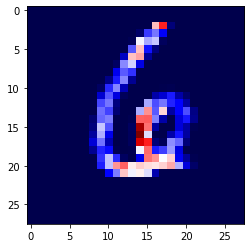

In [71]:
gradient_analyzer = innvestigate.create_analyzer("lrp.z", autoencoder, neuron_selection_mode="index")
analysis = np.zeros(input_size)
for neuron_index in range(hidden_size):
    neuron_weight = gradient_analyzer.analyze(image.reshape(1,784), neuron_index)[0]
    neuron_weight[neuron_weight<0] = 0
    analysis = np.add(analysis, neuron_weight)
plt.imshow(analysis.reshape(28, 28), cmap='seismic', interpolation='nearest')
plt.show()

In [70]:
analysis

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [72]:
analysis

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

Analyzer from encoder

In [68]:
sum(analysis>0)

155

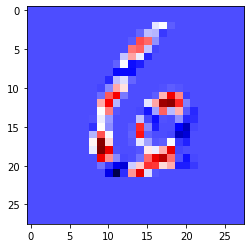

In [37]:
conv_encoder = Model(x, h)
gradient_analyzer = innvestigate.create_analyzer("lrp.z",conv_encoder)
analysis = gradient_analyzer.analyze(image.reshape(1,784))
plt.imshow(analysis.reshape(28, 28), cmap='seismic', interpolation='nearest')
plt.show()

In [69]:
analysis

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

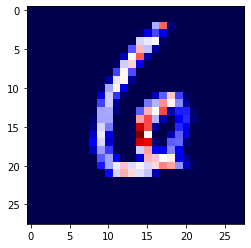

In [24]:
gradient_analyzer = innvestigate.create_analyzer("lrp.z", conv_encoder, neuron_selection_mode="index")
analysis = np.zeros(input_size)
for neuron_index in range(hidden_size):
    analysis = np.add(analysis, gradient_analyzer.analyze(image.reshape(1,784), neuron_index))
plt.imshow(analysis.reshape(28, 28), cmap='seismic', interpolation='nearest')
plt.show()

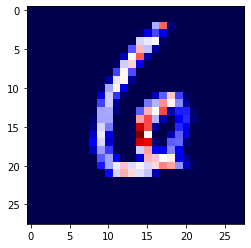

In [33]:
data = preprocessing.minmax_scale(analysis, axis=1)
plt.imshow(data.reshape(28, 28), cmap='seismic', interpolation='nearest')
plt.show()

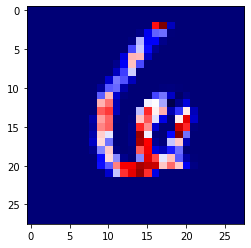

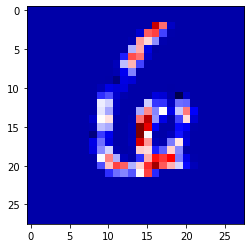

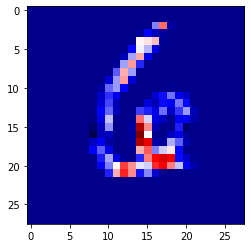

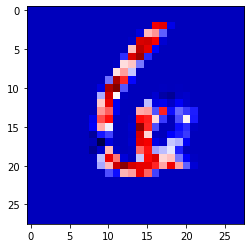

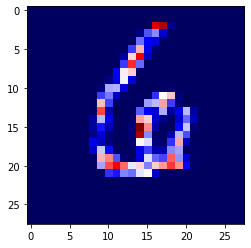

In [12]:
gradient_analyzer = innvestigate.create_analyzer("lrp.epsilon", autoencoder, neuron_selection_mode="index")
for neuron_index in range(5):
    analysis = gradient_analyzer.analyze(image.reshape(1,784), neuron_index)
    plt.imshow(analysis.reshape(28, 28), cmap='seismic', interpolation='nearest')
    plt.show()

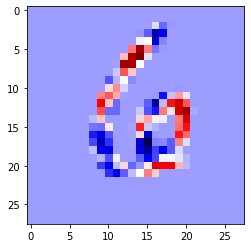

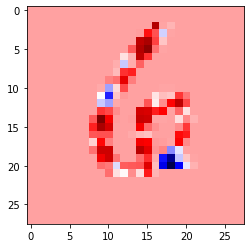

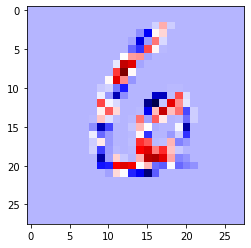

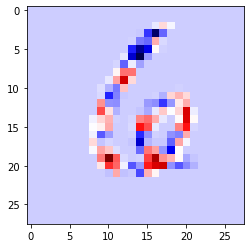

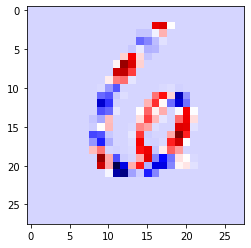

In [14]:
gradient_analyzer = innvestigate.create_analyzer("lrp.epsilon", conv_encoder, neuron_selection_mode="index")
for neuron_index in range(5):
    analysis = gradient_analyzer.analyze(image.reshape(1,784), neuron_index)
    plt.imshow(analysis.reshape(28, 28), cmap='seismic', interpolation='nearest')
    plt.show()

In [148]:
analysis = gradient_analyzer.analyze(image.reshape(1,784), 63)

In [149]:
analysis.shape

(1, 784)

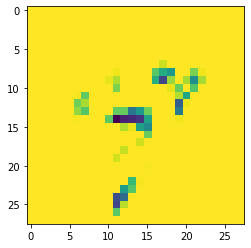

In [80]:
test = np.where(analysis >0, 0, analysis)

plt.imshow(test.reshape(28, 28))
plt.show()

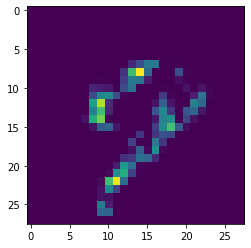

In [81]:
test = np.where(analysis <0, 0, analysis)

plt.imshow(test.reshape(28, 28))
plt.show()

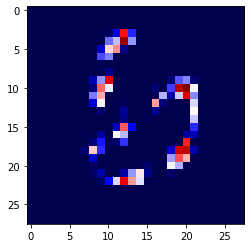

In [150]:
plt.imshow(analysis.reshape(28, 28), cmap='seismic')
plt.show()

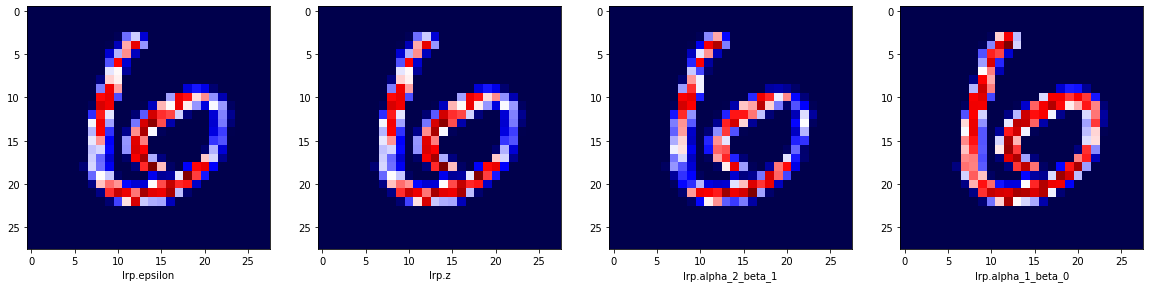

In [146]:
methods = ["lrp.epsilon","lrp.z",'lrp.alpha_2_beta_1','lrp.alpha_1_beta_0']
plt.figure(figsize=(20,10))
for i in range(len(methods)):

    gradient_analyzer = innvestigate.create_analyzer(methods[i], conv_encoder, neuron_selection_mode="index")
    img_sum = np.zeros(shape=(1, 784))
    for neuron_index in range(hidden_size):
        img_sum += gradient_analyzer.analyze(image.reshape(1,784), neuron_index)

    plt.subplot(1,len(methods), i+1)
    plt.imshow(img_sum.reshape(28, 28), cmap='seismic')
    plt.xlabel(methods[i])
plt.show()


In [13]:
for ii, output_neuron in enumerate([4, 5, 6, 8, 9]):
    print(ii)
    print(output_neuron)

0
4
1
5
2
6
3
8
4
9
